Data Science
===================================
Principal Components Analysis (PCA)
-----------------------------------

###### a.k.a. Singular Value Decomposition (SVD) a.k.a. Eigenvalue Decomposition (EVD) a.k.a. Empirical Orthogonal Functions (EOF) a.k.a. Karhunen–Loève transform (KLT) a.k.a. Proper Orthogonal Decomposition (POD) a.k.a. the Hotelling transform a.k.a. factor analysis a.k.a. Eckart–Young theorem a.k.a. Schmidt–Mirsky theorem etc.

Alessandro Gagliardi

1. [Review](#Review)
2. [Multicollinearity](#Recall)
3. [Heptathalon Example](#Example)
4. [Principal Components Analysis (PCA)](#Principal-Components-Analysis)
    1. [Percent Variance Accounted For (a.k.a. $R^2$)](#Percent-Variance-Accounted-For)
    2. [Rotations (or Loadings)](#Rotations)
    3. [Scaling](#Scaling)
6. [Lab](13-PCA_lab.ipynb)

# Review

Text Feature Extraction for Classification Lab 
---
---

# Recall

## Multicollinearity

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import plt

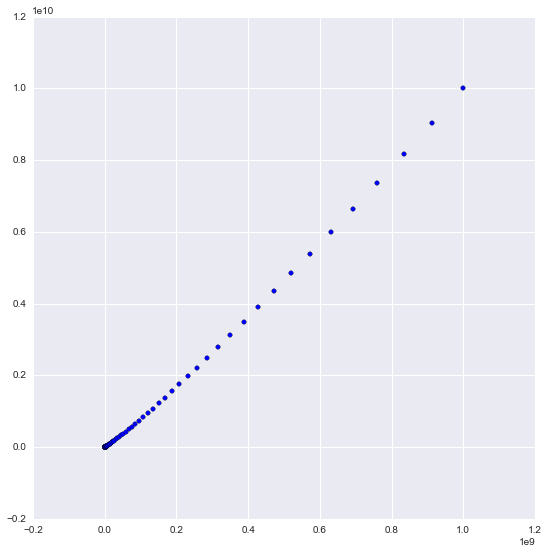

In [2]:
x = np.arange(1,10.1,0.1)
plt.figure(figsize=(9, 9))
plt.scatter(x**9, x**10)

# Example

## Results of the Olympic Heptathlon Competition, Seoul, 1988

_from D. J. Hand, F. Daly, A. D. Lunn, K. J. McConway and E. Ostrowski (1994). A Handbook of Small Datasets, Chapman and Hall/CRC, London_

In [18]:
heptathlon = pd.read_csv('data/heptathlon.csv', index_col=0)
heptathlon.describe().T

,count,mean,std,min,25%,50%,75%,max
hurdles,25,13.8400,0.736648,12.69,13.47,13.75,14.07,16.42
highjump,25,1.7820,0.077942,1.50,1.77,1.80,1.83,1.86
shot,25,13.1176,1.491884,10.00,12.32,12.88,14.20,16.23
run200m,25,24.6492,0.969557,22.56,23.92,24.83,25.23,26.61
longjump,25,6.1524,0.474212,4.88,6.05,6.25,6.37,7.27
javelin,25,41.4824,3.545656,35.68,39.06,40.28,44.54,47.50
run800m,25,136.0540,8.291088,124.20,132.24,134.74,138.48,163.43
score,25,6090.6000,568.469729,4566.00,5746.00,6137.00,6351.00,7291.00


<small><i>adapted from <u>A Handbook of Statistical Analyses Using **R**</u>:</i></small>  

To begin it will help to score all the seven events in the same direction, so that ‘large’ values are ‘good’. We will recode the running events to achieve this.

In [19]:
heptathlon.hurdles = heptathlon.hurdles.max() - heptathlon.hurdles
heptathlon.run200m = heptathlon.run200m.max() - heptathlon.run200m
heptathlon.run800m = heptathlon.run800m.max() - heptathlon.run800m
X_heptathlon = heptathlon.icol(range(7))
y_heptathlon = heptathlon.score

In [20]:
print X_heptathlon.corr().applymap('{:.2f}'.format)

         hurdles highjump  shot run200m longjump javelin run800m
hurdles     1.00     0.81  0.65    0.77     0.91    0.01    0.78
highjump    0.81     1.00  0.44    0.49     0.78    0.00    0.59
shot        0.65     0.44  1.00    0.68     0.74    0.27    0.42
run200m     0.77     0.49  0.68    1.00     0.82    0.33    0.62
longjump    0.91     0.78  0.74    0.82     1.00    0.07    0.70
javelin     0.01     0.00  0.27    0.33     0.07    1.00   -0.02
run800m     0.78     0.59  0.42    0.62     0.70   -0.02    1.00


One of these things is not like the other. Do you see it?

Scores in of the events with the exception of `javelin` are correlated with one another.

`javelin` is considered a 'technical' event while the others are considered 'power'-based events.

# Principal Components Analysis

PCA was invented multiple times independently to solve different but related problems.

PCA is equivalent to what is known as the singular value decomposition (SVD) of $\bf{X}$ and the eigenvalue decomposition (EVD), a.k.a. the spectral decomposition of $\bf{X^TX}$ in linear algebra.

_FYI: SVD and EVD are slightly different and if your linear algebra skills are up to the task, I encourage you to see how they compare, but for our purposes we may treat them as equivalent._

<small>_from [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis):_</small>  
> Depending on the field of application, it is also named the discrete Karhunen–Loève transform (KLT) in signal processing, the Hotelling transform in multivariate quality control, proper orthogonal decomposition (POD) in mechanical engineering . . . factor analysis, Eckart–Young theorem (Harman, 1960), or Schmidt–Mirsky theorem in psychometrics, empirical orthogonal functions (EOF) in meteorological science, empirical eigenfunction decomposition (Sirovich, 1987), empirical component analysis (Lorenz, 1956), quasiharmonic modes (Brooks et al., 1988), spectral decomposition in noise and vibration, and empirical modal analysis in structural dynamics.

_Factor Analysis differs from PCA in that Factor Analysis tests an *a priori* model while PCA makes no assumptions about the underlying structure of the data. Other methods mentioned may also differ in minor ways from what follows but they are all mathemtically related._

### Why so many names for the same thing?

Principal Components Analysis (PCA)
========================================================
PCA reveals a fundamental mathematical relationship between variables.

It has many uses, but the ones we are most interested in are:

* transforming collinear variables into orthogonal factors

* dimensionality reduction

_Side note: another, arguably better way to *orthogonalize* vectors is to use Independent Component Analysis (ICA). The main problem with ICA is that you need to know how many independent components there are to begin with. For that reason, its utility is limited and we will focus on PCA._

Dimensionality Reduction
========================================================
What is dimensionality reduction?

What are the motivations for dimensionality reduction?

What are different ways to perform dimensionality reduction?

Q:  What is dimensionality reduction?

A:  A set of techniques for reducing the size (in terms of features, records, and/or bytes) of the dataset under examination.

In general, the idea is to regard the dataset is a matrix and to decompose the matrix into simpler, meaningful pieces.

Dimensionality reduction is frequently performed as a pre-processing step before another learning algorithm is applied.

Q:  What are the motivations for dimensionality reduction?

The number of features in our dataset can be difficult to manage, or even misleading (e.g. if the relationships are actually simpler than they appear).

- reduce computational expense
- reduce susceptibility to overfitting
- reduce noise in the dataset
- enhance our intuition

Q:  What are different ways to perform dimensionality reduction?

A:  There are two approaches: feature selection and feature extraction.

**feature selection** – selecting a subset of features using an external criterion (*filter*) or the learning algorithm accuracy itself (*wrapper*)

**feature extraction** – mapping the features to a lower dimensional space

Feature selection is important, but typically when people say dimensionality reduction, they are referring to *feature extraction*.

The goal of feature extraction is to create a new set of coordinates that *simplify the representation* of the data.

This is what we are doing with PCA.

How does it work?
========================================================
We want to find a new matrix $P$ from original data $X$ so that the covariance matrix of $PX$ is diagonal (i.e. the resulting vectors are all orthogonal to one another) and entries on diagonal are descending order. In the process:

* Maximize the variance.
* Minimize the projection error.

$$ P_{m\times m}X_{m\times n} = Y_{m\times n} $$

If this works out, $Y_{m\times n}$ is out new data set!

- N.B.: The X here is the tranpose of a typical design matrix..
  - See the Shlens paper for more info.
- Its goal is to extract the important information from the data and to express this information as a set of new orthogonal variables called principal components.
- A *linear* transformation!  This is a big assumption.
- *Is there another basis, which is a linear combination of the original basis, that best re-expresses our data set?*
- This transformation will become the *principal components* of X.
- What does the transformation boil down to?
 - Rotation and scale.. so how does that help us?
 - What should our P be doing?
 - What do we want our Y do look like?

<img src="assets/512px-GaussianScatterPCA.png" />

<img src="assets/signal_noise.png" width=600 />

Every dataset has noise and signal... How can we bring out the signal?

$$ SNR = \frac{\sigma^2_{signal}}{\sigma^2_{noise}} $$

Rotate to maximize variance
========================================================
<img src="assets/svn.png" width=600 />

# Heptathlon

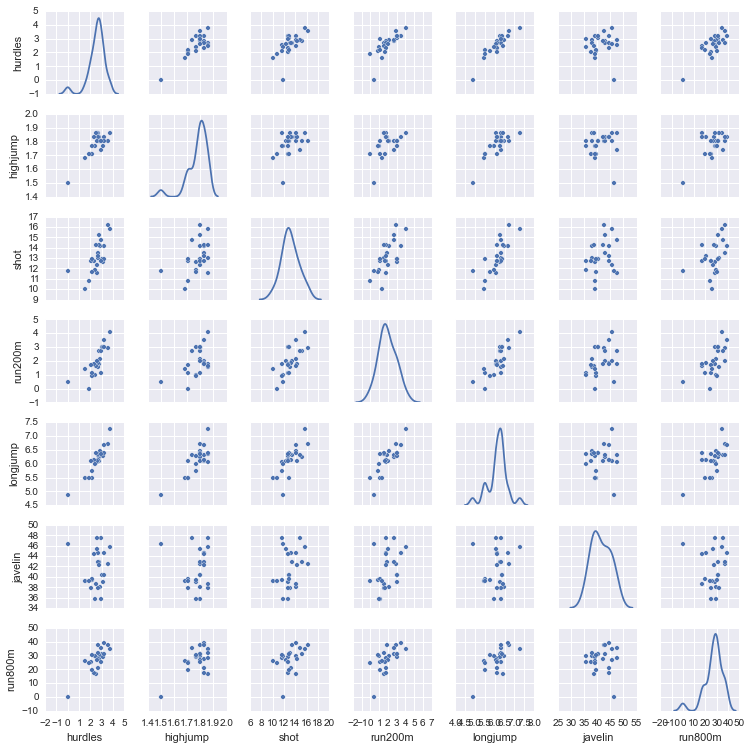

In [31]:
sns.pairplot(X_heptathlon, diag_kind='kde', size=1.5)

Principal Components
========================================================
The hard way:
--------------------------------------------------------

In [32]:
from __future__ import division

# transpose and scale the original data
scaled_heptathlon = (X_heptathlon - X_heptathlon.mean()) / X_heptathlon.std()
X = np.matrix(scaled_heptathlon.T)

# Calculate P
A = X * X.T
E = np.linalg.eig(A)
P = E[1].T

# Find the new data and standard deviations of the principal components
newdata = P * X
sdev =  np.sqrt((1/(X.shape[1]-1)* P * A * P.T).diagonal())
print "Standard deviations:\n{}".format(sdev)
print "\nRotation:\n{}".format(E[1])

Standard deviations:
[[ 2.11193635  1.09284974  0.22136171  0.27010291  0.49524412  0.72181309
   0.67614113]]

Rotation:
[[ 0.45287105 -0.15792058 -0.38024707 -0.78334101 -0.09494792  0.04514996
  -0.02653873]
 [ 0.37719923 -0.24807386  0.43393114  0.09939981  0.01879888  0.36777902
  -0.67999172]
 [ 0.3630725   0.28940743  0.21762491 -0.05085983  0.51165201 -0.67618919
  -0.12431725]
 [ 0.40789504  0.26038545  0.45338483  0.02495639 -0.64983404 -0.08359211
   0.3610658 ]
 [ 0.45623185 -0.05587394 -0.61206388  0.59020972 -0.1842981  -0.13931653
  -0.11129249]
 [ 0.075409    0.84169212 -0.17294667 -0.02724076  0.13510669  0.47156016
  -0.12079924]
 [ 0.37495938 -0.22448984  0.09830963  0.1555552   0.50432116  0.39585671
   0.6034113 ]]


Principal Components
========================================================
The easy way:
--------------------------------------------------------

In [33]:
from statsmodels.sandbox.tools.tools_pca import pca
prcomp = pca(X.T)
print "Standard deviations:\n{}".format(np.sqrt(prcomp[2]))
print "\nRotation:\n{}".format(prcomp[3])

Standard deviations:
[ 2.11193635  1.09284974  0.72181309  0.67614113  0.49524412  0.27010291
  0.22136171]

Rotation:
[[ 0.45287105 -0.15792058  0.04514996 -0.02653873 -0.09494792 -0.78334101
  -0.38024707]
 [ 0.37719923 -0.24807386  0.36777902 -0.67999172  0.01879888  0.09939981
   0.43393114]
 [ 0.3630725   0.28940743 -0.67618919 -0.12431725  0.51165201 -0.05085983
   0.21762491]
 [ 0.40789504  0.26038545 -0.08359211  0.3610658  -0.64983404  0.02495639
   0.45338483]
 [ 0.45623185 -0.05587394 -0.13931653 -0.11129249 -0.1842981   0.59020972
  -0.61206388]
 [ 0.075409    0.84169212  0.47156016 -0.12079924  0.13510669 -0.02724076
  -0.17294667]
 [ 0.37495938 -0.22448984  0.39585671  0.6034113   0.50432116  0.1555552
   0.09830963]]


In [34]:
def pca_rotations(prcomp, columns=[]): 
    if len(columns) <> len(prcomp.components_):
        columns = range(1, len(prcomp.components_) + 1)
    return pd.DataFrame(prcomp.components_, 
                        index=(map("PC{}".format, range(1, len(prcomp.components_) + 1))), 
                        columns=columns).T

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline((
    ('scaler', StandardScaler()),
    ('prcomp', PCA()),
))
pipeline.fit(X_heptathlon.copy())
heptathlon_pca = pipeline.steps[1][1]

print "Standard deviations:\n\t " + ' '.join(map("{:.6}".format, np.sqrt(heptathlon_pca.explained_variance_)))
pca_rotations(heptathlon_pca, X_heptathlon.columns)

Standard deviations:
	 2.11194 1.09285 0.721813 0.676141 0.495244 0.270103 0.221362


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
hurdles,-0.452871,0.157921,-0.045150,0.026539,-0.094948,-0.783341,0.380247
highjump,-0.377199,0.248074,-0.367779,0.679992,0.018799,0.099400,-0.433931
shot,-0.363072,-0.289407,0.676189,0.124317,0.511652,-0.050860,-0.217625
run200m,-0.407895,-0.260385,0.083592,-0.361066,-0.649834,0.024956,-0.453385
longjump,-0.456232,0.055874,0.139317,0.111292,-0.184298,0.590210,0.612064
javelin,-0.075409,-0.841692,-0.471560,0.120799,0.135107,-0.027241,0.172947
run800m,-0.374959,0.224490,-0.395857,-0.603411,0.504321,0.155555,-0.098310


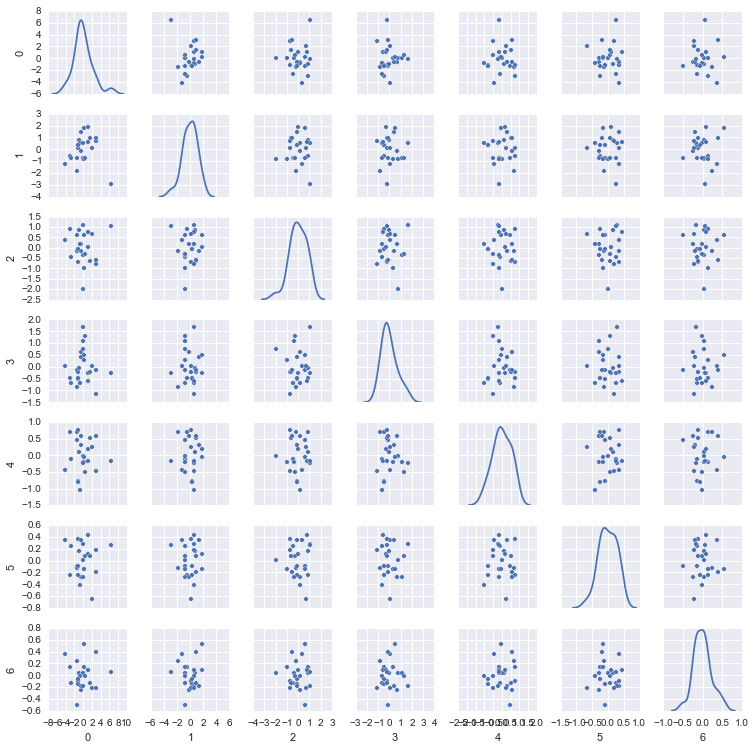

In [39]:
pcs = pipeline.transform(X_heptathlon.copy())  # copy because transform happens in-place
pc_df = pd.DataFrame(pcs)  # cast resulting matrix as a data frame
sns.pairplot(pc_df, diag_kind='kde', size=1.5)

Notice the scale on each principal component.

# Percent Variance Accounted For

## $(a.k.a. R^2)$

In [40]:
def pca_summary(prcomp):
    return pd.DataFrame([np.sqrt(prcomp.explained_variance_), 
              prcomp.explained_variance_ratio_, 
              prcomp.explained_variance_ratio_.cumsum()],
             index = ["Standard deviation", "Proportion of Variance", "Cumulative Proportion"], 
             columns = (map("PC{}".format, range(1, len(prcomp.components_)+1))))

In [41]:
pca_summary(heptathlon_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,2.111936,1.092850,0.721813,0.676141,0.495244,0.270103,0.221362
Proportion of Variance,0.637182,0.170617,0.074431,0.065310,0.035038,0.010422,0.007000
Cumulative Proportion,0.637182,0.807799,0.882230,0.947540,0.982578,0.993000,1.000000


Visually:
--------------------------------------------------------

<Container object of 7 artists>

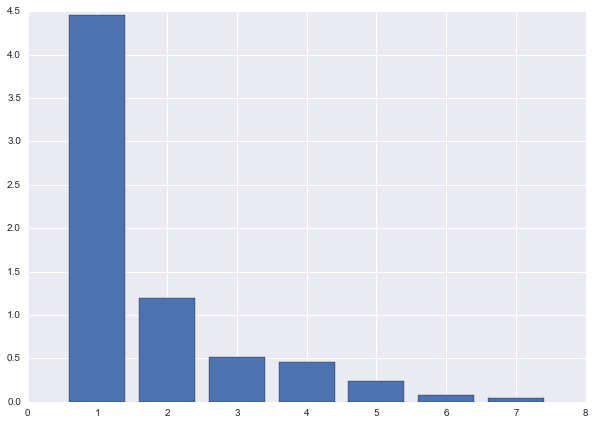

In [42]:
plt.figure(figsize=(10, 7))
plt.bar(range(1, 8), heptathlon_pca.explained_variance_, align='center')

Recall: How we fix multicollinearity with polynomials
========================================================
Replace the correlated predictors with uncorrelated predictors

$$ y = \alpha + \beta_1 f_1(x) + \beta_2 f_2(x^2) + \ldots + \beta_n f_n(x^n) + \epsilon $$

Technical Note: These polynomial functions form an _orthogonal basis_ of the function space.

Where do Principal Components Come From?
========================================================
$$ PC_1 = W_{1,1} \times x_1 + W_{1,2} \times x_2 + \cdots + W_{1,n} \times x_n \\
PC_2 = W_{2,1} \times x_1 + W_{2,2} \times x_2 + \cdots + W_{2,n} \times x_n \\
\vdots \\
PC_n = W_{n,1} \times x_1 + W_{n,2} \times x_2 + \cdots + W_{n,n} \times x_n $$

scaled:

$$ PC_1 = W_{1,1} \times \frac{x_1-\bar{x_1}}{\sigma_{x_1}} + W_{1,2} \times \frac{x_2-\bar{x_2}}{\sigma_{x_2}} + \cdots + W_{1,n} \times \frac{x_n-\bar{x_n}}{\sigma_{x_n}} \\
PC_2 = W_{2,1} \times \frac{x_1-\bar{x_1}}{\sigma_{x_1}}  + W_{2,2} \times \frac{x_2-\bar{x_2}}{\sigma_{x_2}} + \cdots + W_{2,n} \times \frac{x_n-\bar{x_n}}{\sigma_{x_n}} \\
\vdots \\
PC_n = W_{n,1} \times \frac{x_1-\bar{x_1}}{\sigma_{x_1}}  + W_{n,2} \times \frac{x_2-\bar{x_2}}{\sigma_{x_2}} + \cdots + W_{n,n} \times \frac{x_n-\bar{x_n}}{\sigma_{x_n}} $$

# Rotations

## (or Loadings)

These weights are called "rotations" because they *rotate* the vector space. (They are also called "loadings")

In [46]:
pd.DataFrame(heptathlon_pca.components_, index=(map("PC{}".format, range(1,8))), columns=X_heptathlon.columns).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
hurdles,-0.452871,0.157921,-0.045150,0.026539,-0.094948,-0.783341,0.380247
highjump,-0.377199,0.248074,-0.367779,0.679992,0.018799,0.099400,-0.433931
shot,-0.363072,-0.289407,0.676189,0.124317,0.511652,-0.050860,-0.217625
run200m,-0.407895,-0.260385,0.083592,-0.361066,-0.649834,0.024956,-0.453385
longjump,-0.456232,0.055874,0.139317,0.111292,-0.184298,0.590210,0.612064
javelin,-0.075409,-0.841692,-0.471560,0.120799,0.135107,-0.027241,0.172947
run800m,-0.374959,0.224490,-0.395857,-0.603411,0.504321,0.155555,-0.098310


Notice:  
1. the standard devation of each principal component.
2. the magnitude of the loadings, particularly the first two components with regard to `javelin`.  
_Annoying side effect: PCA often reverse the sign during decomposition. Keep this in mind because it may reverse your interpretation of the results._

# Scaling

* Recall: what is scaling?

* Why is it important? (in other words, why might unscaled variables cause a problem with PCA?)

In [47]:
heptathlon_unscaled_pca = PCA().fit(X_heptathlon.copy())
pca_summary(heptathlon_unscaled_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,8.195643,3.518423,1.357701,0.573879,0.317274,0.144150,0.032578
Proportion of Variance,0.820700,0.151257,0.022523,0.004024,0.001230,0.000254,0.000013
Cumulative Proportion,0.820700,0.971956,0.994479,0.998503,0.999733,0.999987,1.000000


For comparison:

In [48]:
pca_summary(heptathlon_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Standard deviation,2.111936,1.092850,0.721813,0.676141,0.495244,0.270103,0.221362
Proportion of Variance,0.637182,0.170617,0.074431,0.065310,0.035038,0.010422,0.007000
Cumulative Proportion,0.637182,0.807799,0.882230,0.947540,0.982578,0.993000,1.000000


At first glance, this looks better than the scaled version. PC1 accounts for 82% of the variance (while in the scaled PCA, PC1 only accounted for 64%).  
Similarly, with only two components, we account for 97% of the variance. In the scaled version, the first four components only got us to 95%.

# What could go wrong?

In [49]:
X_heptathlon.var()

hurdles      0.542650
highjump     0.006075
shot         2.225719
run200m      0.940041
longjump     0.224877
javelin     12.571677
run800m     68.742142
dtype: float64

If one wanted to account for the majority of the overall variance, one need only look at run800m.

In fact, that's exactly what the unscaled PCA does:

In [50]:
pca_rotations(heptathlon_unscaled_pca, X_heptathlon.columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
hurdles,-0.069509,0.009489,-0.221808,0.327377,0.807029,-0.424851,0.083123
highjump,-0.005570,0.000565,-0.014514,0.021239,0.140138,0.098374,-0.984881
shot,-0.077906,0.135928,-0.883740,-0.425007,-0.104422,-0.051745,-0.015650
run200m,-0.072968,0.101200,-0.310057,0.815852,-0.461787,-0.082486,-0.051313
longjump,-0.040369,0.014885,-0.184943,0.204198,0.318993,0.894593,0.142110
javelin,0.006686,0.985295,0.160213,-0.032169,0.048804,0.006170,0.005033
run800m,-0.990994,-0.012765,0.116558,-0.058277,-0.027848,0.002987,-0.001041


# What else could go wrong?

What if the relationship between the variables is nonlinear?

<img src="assets/pca_fail.png" width=600 />

---

# Lab

[Dimensionality Reduction and Visualization](13-PCA_lab.ipynb)